# Gerando csv de dataset de faixas de trânsito

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile import ZipFile
from skimage import io
from skimage.feature import local_binary_pattern

## Classes de imagens

In [2]:
TARGET_NAMES = {'nao_faixa': 0,
                'faixa_frente': 1,
                'faixa_diagonal_direita': 2,
                'faixa_diagonal_esquerda': 3}

path_dict = {name: [] for name in TARGET_NAMES}

with ZipFile('./texturas.zip') as zip_file:
    for path in zip_file.namelist():
        # a pasta de cada amostra é o segundo elemento do split
        folder = path.split('/')[1]
        # Separando amostras por classe
        if folder in TARGET_NAMES:
            path_dict[folder].append(f'./texturas.zip/{path}')

# Mostrando quantidade de amostras por classe
for target in path_dict:
    print(f'{target}: {len(path_dict[target])} amostras')

# exemplo de path de uma amostra
example_path = path_dict['faixa_frente'][0]
example_path


nao_faixa: 750 amostras
faixa_frente: 250 amostras
faixa_diagonal_direita: 250 amostras
faixa_diagonal_esquerda: 250 amostras


'./texturas.zip/Classes/faixa_frente/96.jpg'

## Mostrando imagem de exemplo e aplicando LBP

Configurações do LBP:
- método: `method='dafault'`
- número de pontos: `P=8`
- raio do cícrculo centrado no píxel: `R=5`

image shape: (720, 1280, 3)


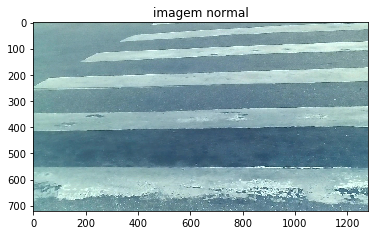

gray image shape: (720, 1280)


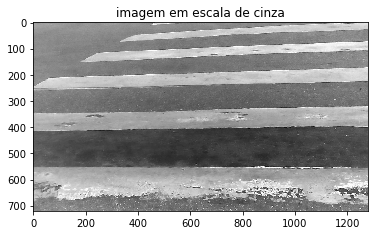

LBP image shape: (720, 1280)


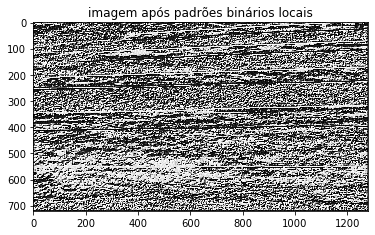

In [3]:
# Imagem normal
img = io.imread(example_path)
plt.imshow(img)
plt.title('imagem normal')
print(f'image shape: {img.shape}')
plt.show()

# Imagem em escala de cinza
img_gray = io.imread(example_path, as_gray=True)
plt.imshow(img_gray)
plt.title('imagem em escala de cinza')
plt.gray()
print(f'gray image shape: {img_gray.shape}')
plt.show()

# Parâmetros do LBP
METHOD = 'default'
RADIUS = 5
N_POINTS = 8

# Imagem após LBP
img_lbp = local_binary_pattern(image=img_gray, P=N_POINTS, R=RADIUS, method=METHOD)
plt.imshow(img_lbp)
plt.title('imagem após padrões binários locais')
print(f'LBP image shape: {img_lbp.shape}')
plt.show()


0.0      75643
1.0      19743
2.0       8181
3.0       5231
4.0      11609
         ...  
251.0     9988
252.0     5603
253.0     8272
254.0    20071
255.0    79707
Length: 256, dtype: int64

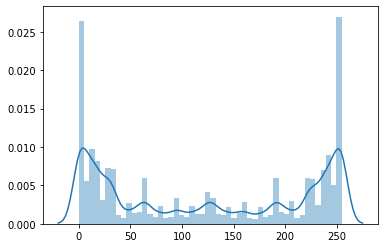

In [4]:
s = pd.Series(data=img_lbp.flatten())
sns.distplot(s)
counts = s.value_counts().sort_index()
counts

## Gerando csv de histogramas por amostra

In [5]:
amostra = []
for target_name in TARGET_NAMES:
    for path in path_dict[target_name]:
        img = io.imread(path, as_gray=True)
        lbp = local_binary_pattern(image=img, P=N_POINTS, R=RADIUS, method=METHOD).flatten()
        hist = pd.Series(lbp).value_counts().sort_index()
        arr = np.zeros(256)
        for i in hist.index:
            arr[int(i)] = hist[i]

        df = pd.DataFrame(data=[arr])
        df['target'] = TARGET_NAMES[target_name]
        amostra.append(df)

data = pd.concat(amostra, ignore_index=True)
data.to_csv('./csvs/lbp_faixas.csv')
data


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,target
0,77249.0,15964.0,8515.0,6235.0,9863.0,3570.0,8621.0,9910.0,8294.0,2944.0,...,8033.0,10604.0,8129.0,3904.0,10317.0,6546.0,9331.0,16714.0,82076.0,0
1,78252.0,22556.0,7702.0,4471.0,12148.0,4000.0,5390.0,4091.0,7435.0,2433.0,...,7509.0,3597.0,5328.0,3663.0,11428.0,4628.0,8839.0,22559.0,87703.0,0
2,84085.0,18489.0,9157.0,5601.0,11526.0,3883.0,7008.0,5917.0,8876.0,3080.0,...,8493.0,4408.0,6061.0,3114.0,10704.0,4950.0,8925.0,17814.0,86954.0,0
3,85028.0,17986.0,8811.0,5025.0,12508.0,4077.0,6335.0,4637.0,9356.0,2903.0,...,8079.0,3786.0,5454.0,3415.0,10910.0,4597.0,8721.0,18109.0,88553.0,0
4,61572.0,15229.0,5963.0,3848.0,10428.0,2990.0,6589.0,6684.0,6457.0,2193.0,...,7270.0,6037.0,7476.0,2763.0,10650.0,5080.0,8217.0,15055.0,77843.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,78852.0,17390.0,8143.0,4753.0,11940.0,3798.0,6847.0,5475.0,8639.0,2865.0,...,7867.0,3334.0,4927.0,2837.0,9729.0,4030.0,7750.0,18230.0,92703.0,3
1496,67122.0,20692.0,6663.0,4562.0,10261.0,3696.0,5461.0,5018.0,6081.0,2126.0,...,7161.0,3124.0,4910.0,2727.0,9777.0,4382.0,7498.0,20394.0,108524.0,3
1497,70939.0,20669.0,7430.0,4883.0,10928.0,3553.0,5858.0,4990.0,6553.0,2066.0,...,7129.0,3077.0,4583.0,2666.0,9559.0,4532.0,8555.0,19690.0,87509.0,3
1498,90884.0,19215.0,9182.0,5003.0,11916.0,4112.0,5274.0,4249.0,8946.0,2951.0,...,9089.0,3621.0,5466.0,3406.0,11168.0,5116.0,9326.0,19703.0,93347.0,3


## Experimentando classificação com dados dos histogramas gerados

In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

              precision    recall  f1-score   support

   nao_faixa       0.99      0.95      0.97       226
   tem_faixa       0.95      0.99      0.97       224

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



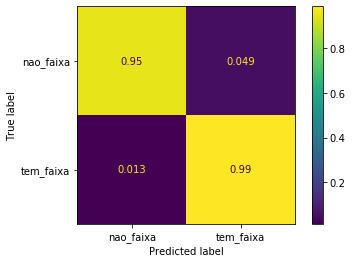

In [7]:
data = pd.read_csv('./csvs/lbp_faixas.csv')

y = np.array([0 if target == 0 else 1 for target in data.pop('target')])
X = data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_confusion_matrix(
  estimator=clf,
  X=X_test,
  y_true=y_test,
  display_labels=['nao_faixa', 'tem_faixa'],
  normalize='true')

print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['nao_faixa', 'tem_faixa']))